# Частотный конвертер

**Входные данные:** дискретный сигнал $x$ с частотой дискретизации $N_1$

**Задача:** преобразовать сигнал $x$ в сигнал $y$ с частотой дискретизации $N_2$

1. Реализация

Реализация будет состоять из трех этапов:

*   Растяжение: между каждой парой значений исходного сигнала вставить $N_2 - 1$ нулей
*   Фильтрация: отфильтровать растянутый сигнал с помощью фильтра нижних частот
*   Прореживание: выделить из отфильтрованного сигнала новый сигнал с шагом $N_1$




In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import scipy
import scipy.signal
from IPython.display import display
import librosa.display
%matplotlib inline

In [3]:
def freq_conv(x, N1, N2):

  N=len(x)*N2
  n=min(N1,N2)

  #растяжение
  xx = np.array([x[i//N2] if i%N2==0 else 0 for i in range(N)])
  #print('растяжение: ', xx)

  #фильтрация
  xx_spec = np.fft.fft(xx)
  filter = N2 * (np.abs(np.fft.fftfreq(N, 1.0/N)) < n//2)
  xx_filtered = np.real(np.fft.ifft(xx_spec * filter))
  #xx_filtered = np.convolve(xx, np.ones(N2))

  #прореживание 
  y = xx_filtered[::N1]

  return (y)

В данном варианте этап фильтрации был реализован в частотной области с помощью прямого и обратного преобразования Фурье, что приводит к большому колличеству вычислений и нагружает систему. Для оптимизации работы алгоритма этап фильтрации можно реализовать с помощью свертки с единичным окном.

In [17]:
def freq_conv_v2(x, N1, N2):

  N=len(x)*N2
  n=min(N1,N2)

  #растяжение
  xx = np.array([x[i//N2] if i%N2==0 else 0 for i in range(N)])
  #print('растяжение: ', xx)

  #фильтрация
  xx_filtered = np.convolve(xx, np.ones(N2))

  #прореживание 
  y = xx_filtered[::N1]

  return (y)

2. Визуализация результатов работы

Определим сигнал с частотой дисктеризации $N_1$ = 500. 

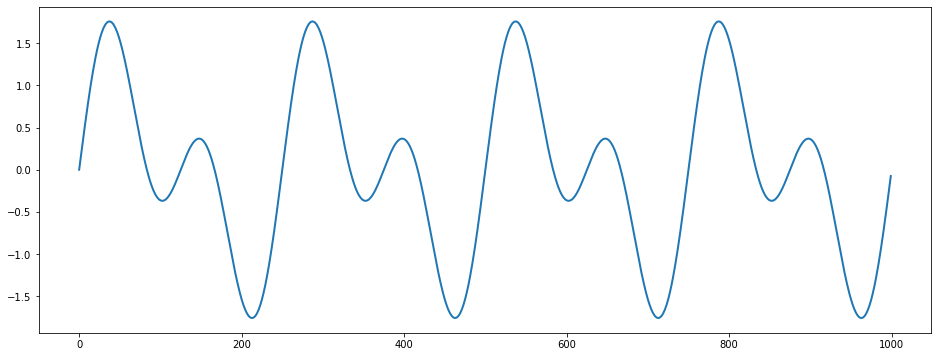

In [13]:
N1 = 500
n_samples = 1000
t = np.arange(n_samples) / N1
signal = np.sin(2*np.pi*2*t) + np.sin(2*np.pi*4*t)
plt.figure(figsize=(16, 6))
plt.plot(signal, linewidth = 2)

Результата работы алгоритма для $N_2 = 300$

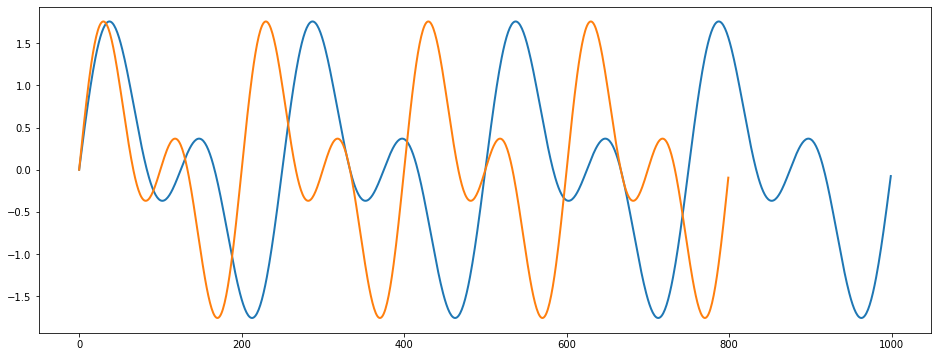

In [19]:
N2 = 400
signal_res = freq_conv(signal, N1, N2)
plt.figure(figsize=(16, 6))
plt.plot(signal, linewidth = 2)
plt.plot(signal_res, linewidth = 2)

Результата работы алгоритма для $N_2 = 700$

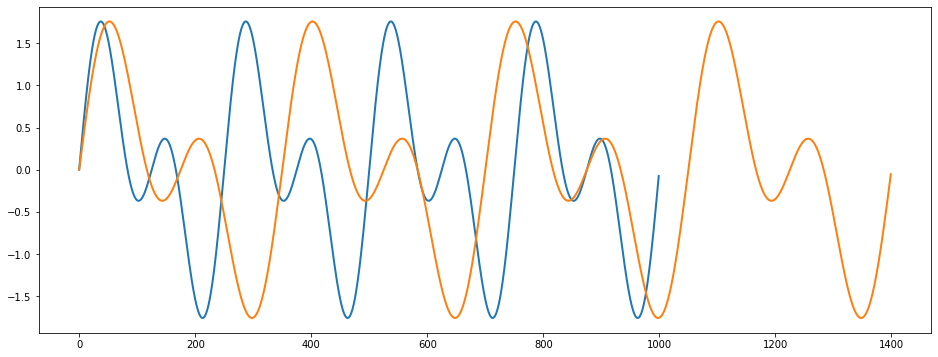

In [16]:
N2 = 700
signal_res = freq_conv(signal, N1, N2)
plt.figure(figsize=(16, 6))
plt.plot(signal, linewidth = 2)
plt.plot(signal_res, linewidth = 2)